# Mental Health Dataset

## Overview of the Dataset
- Link: https://www.kaggle.com/datasets/bhavikjikadara/mental-health-dataset
### Column Descriptions
- Timestamp: The date and time when the respondent submitted the survey.

- Gender: The respondent’s gender identity.

- Country: The country where the respondent resides.

- Occupation: The respondent’s job role or profession.

- Self_Employed: Indicates if the respondent is self-employed (Yes/No).

- Family_History: Whether the respondent has a family history of mental illness (Yes/No).

- Treatment: Whether the respondent has ever sought treatment for a mental health condition (Yes/No).

- Days_Indoors: How many days the respondent stayed indoors recently, possibly due to external stressors.

- Growing_Stress: Indicates if the respondent feels their stress levels are increasing.

- Changes_Habits: Reports any noticeable changes in habits or routines.

- Mental_Health_History: Indicates if the respondent has a past diagnosis or history of mental health issues.

- Mood_Swings: Whether the respondent experiences sudden or frequent mood changes.

- Coping_Struggles: Whether the respondent struggles to cope with everyday stress or pressure.

- Work_Interest: Level of interest or engagement the respondent has in their work.

- Social_Weakness: Difficulty in maintaining or engaging in social interactions.

- Mental_Health_interview: Whether the respondent would feel comfortable discussing mental health with a potential employer during a job interview.

- Care_Options: Awareness of available mental health care resources or options.

In [46]:
# Import tools for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# Load the dataset from Kaggle
df = pd.read_csv("../data/mhd_kaggle.csv", sep=',')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [49]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [50]:
df.tail()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
292359,7/27/2015 23:25,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292360,8/17/2015 9:38,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292361,8/25/2015 19:59,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,9/26/2015 1:07,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292363,2/1/2016 23:04,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


In [51]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%m/%d/%Y %H:%M')

In [52]:
df['Date'] = df['Timestamp'].dt.date
df['Time'] = df['Timestamp'].dt.time

In [53]:
df.Date.nunique()

33

In [54]:
df.Date.value_counts().head(10)

Date
2014-08-27    144946
2014-08-28     76546
2014-08-29     37540
2015-02-21      8366
2014-08-30      5114
2014-09-01      3120
2014-09-02      2384
2015-02-24      1994
2014-09-04      1604
2014-09-08       824
Name: count, dtype: int64

In [55]:
df.Country.value_counts().head(10)

Country
United States     171308
United Kingdom     51404
Canada             18726
Australia           6026
Netherlands         5894
Ireland             5548
Germany             4680
Sweden              2818
India               2774
France              2340
Name: count, dtype: int64

In [56]:
df.treatment.unique()

array(['Yes', 'No'], dtype=object)

In [57]:
df.treatment.value_counts()

treatment
Yes    147606
No     144758
Name: count, dtype: int64

In [58]:
df.Occupation.value_counts()

Occupation
Housewife    66351
Student      61794
Corporate    61229
Others       52841
Business     50149
Name: count, dtype: int64

In [59]:
df.Gender.value_counts()

Gender
Male      239850
Female     52514
Name: count, dtype: int64

In [60]:
df.Changes_Habits.unique()

array(['No', 'Yes', 'Maybe'], dtype=object)

In [61]:
df.Mood_Swings.unique()

array(['Medium', 'Low', 'High'], dtype=object)

In [62]:
df.Mood_Swings.value_counts()

Mood_Swings
Medium    101064
Low        99834
High       91466
Name: count, dtype: int64

In [63]:
df.Work_Interest.unique()

array(['No', 'Maybe', 'Yes'], dtype=object)

In [64]:
df.Days_Indoors.unique()

array(['1-14 days', 'Go out Every day', 'More than 2 months',
       '15-30 days', '31-60 days'], dtype=object)

In [65]:
df.Timestamp.nunique()

580

In [66]:
# df1 is new dataframe with only the columns we are interested in
df1 = df.drop(columns=['Timestamp', 'Date', 'Time'])
df1.drop_duplicates(inplace=True)
df1.treatment.value_counts()

treatment
No     50350
Yes    47373
Name: count, dtype: int64

In [67]:
df1.columns = df1.columns.str.lower()

In [68]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97723 entries, 0 to 292360
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gender                   97723 non-null  object
 1   country                  97723 non-null  object
 2   occupation               97723 non-null  object
 3   self_employed            92920 non-null  object
 4   family_history           97723 non-null  object
 5   treatment                97723 non-null  object
 6   days_indoors             97723 non-null  object
 7   growing_stress           97723 non-null  object
 8   changes_habits           97723 non-null  object
 9   mental_health_history    97723 non-null  object
 10  mood_swings              97723 non-null  object
 11  coping_struggles         97723 non-null  object
 12  work_interest            97723 non-null  object
 13  social_weakness          97723 non-null  object
 14  mental_health_interview  97723 non-null  o

In [69]:
df1.occupation.value_counts()

occupation
Housewife    22176
Student      20746
Corporate    20189
Others       17753
Business     16859
Name: count, dtype: int64

In [70]:
df1.gender.value_counts()

gender
Male      74880
Female    22843
Name: count, dtype: int64

In [71]:
df1.gender.value_counts('Treatment')

gender
Male      0.766247
Female    0.233753
Name: proportion, dtype: float64

In [72]:
df1.country.nunique()

35

In [73]:
df1.country.value_counts().head(10)

country
United States     26211
United Kingdom    18042
Canada            11597
Australia          4803
Germany            4290
Ireland            3982
Netherlands        3941
Sweden             2422
Brazil             2340
New Zealand        1991
Name: count, dtype: int64

In [74]:
df.Country.value_counts().head(10)

Country
United States     171308
United Kingdom     51404
Canada             18726
Australia           6026
Netherlands         5894
Ireland             5548
Germany             4680
Sweden              2818
India               2774
France              2340
Name: count, dtype: int64

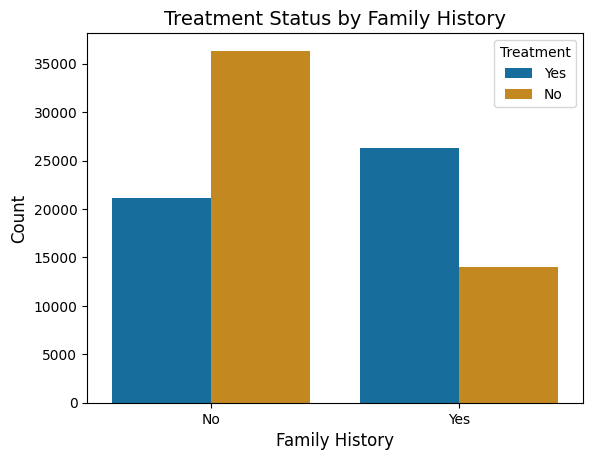

In [75]:
#plt.figure(figsize=(12, 5))
sns.countplot(data=df1, x='family_history', hue='treatment', palette='colorblind')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Family History', fontsize=12)
plt.title('Treatment Status by Family History', fontsize=14)
plt.legend(title='Treatment')
plt.show()

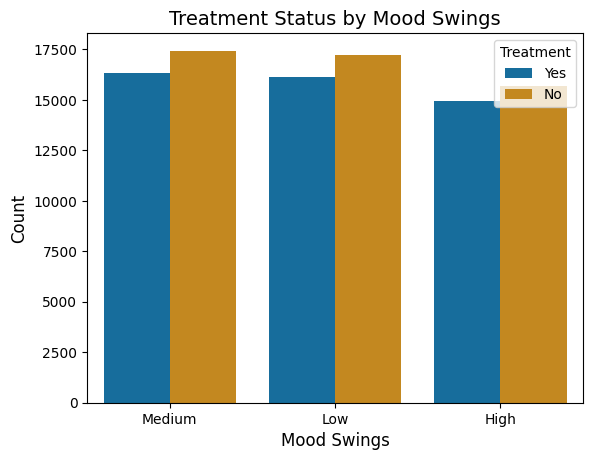

In [76]:
#plt.figure(figsize=(12, 5))
sns.countplot(data=df1, x='mood_swings', hue='treatment', palette='colorblind')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Mood Swings', fontsize=12)
plt.title('Treatment Status by Mood Swings', fontsize=14)
plt.legend(title='Treatment')
plt.show()

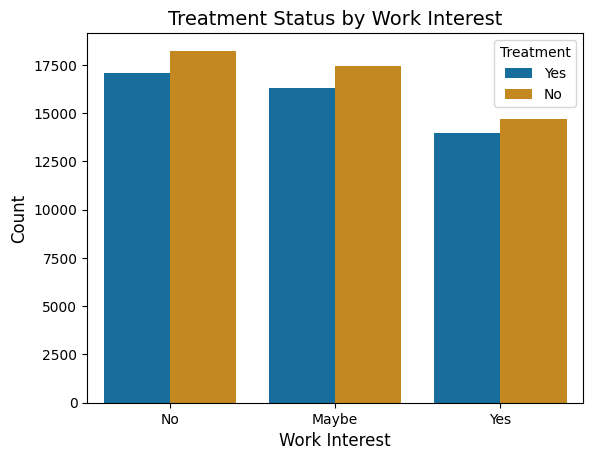

In [77]:
#plt.figure(figsize=(12, 5))
sns.countplot(data=df1, x='work_interest', hue='treatment', palette='colorblind')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Work Interest', fontsize=12)
plt.title('Treatment Status by Work Interest', fontsize=14)
plt.legend(title='Treatment')
plt.show()

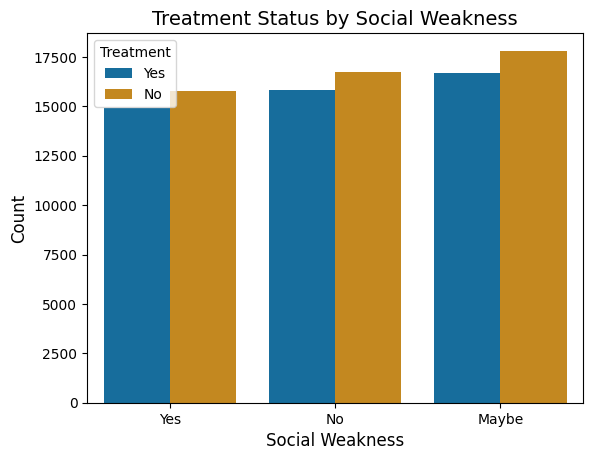

In [78]:
#plt.figure(figsize=(12, 5))
sns.countplot(data=df1, x='social_weakness', hue='treatment', palette='colorblind')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Social Weakness', fontsize=12)
plt.title('Treatment Status by Social Weakness', fontsize=14)
plt.legend(title='Treatment')
plt.show()

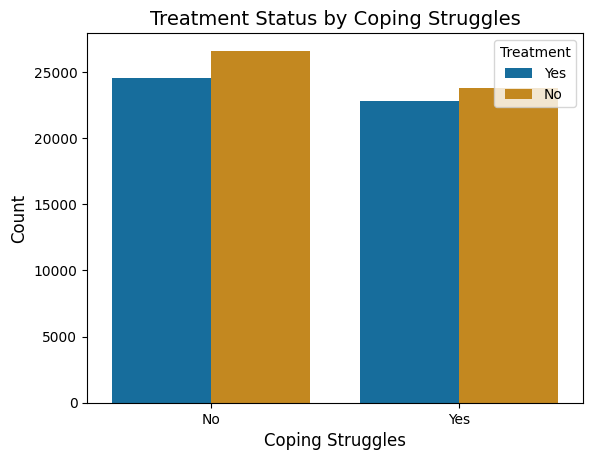

In [79]:
#plt.figure(figsize=(12, 5))
sns.countplot(data=df1, x='coping_struggles', hue='treatment', palette='colorblind')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Coping Struggles', fontsize=12)
plt.title('Treatment Status by Coping Struggles', fontsize=14)
plt.legend(title='Treatment')
plt.show()

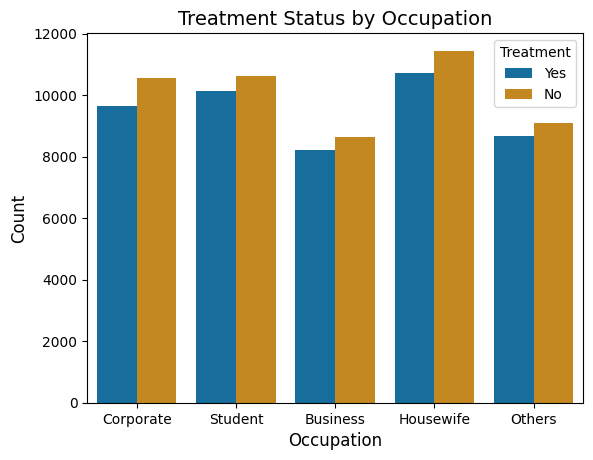

In [80]:
#plt.figure(figsize=(12, 5))
sns.countplot(data=df1, x='occupation', hue='treatment', palette='colorblind')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Occupation', fontsize=12)
plt.title('Treatment Status by Occupation', fontsize=14)
plt.legend(title='Treatment')
plt.show()

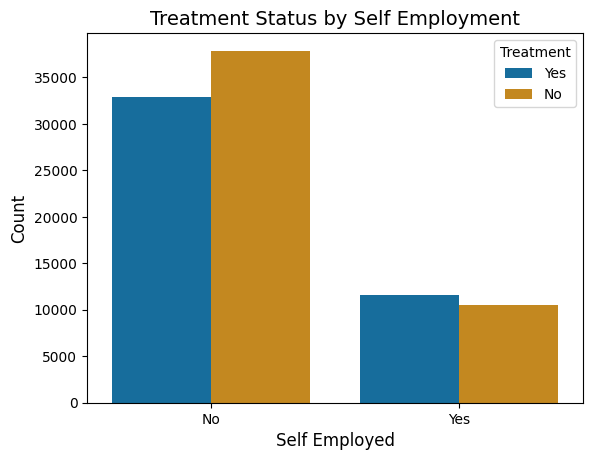

In [81]:
#plt.figure(figsize=(12, 5))
sns.countplot(data=df1, x='self_employed', hue='treatment', palette='colorblind')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Self Employed', fontsize=12)
plt.title('Treatment Status by Self Employment', fontsize=14)
plt.legend(title='Treatment')
plt.show()

In [82]:
seek_support_counts = df1.groupby('gender')['treatment'].value_counts().unstack(fill_value=0)
if 'Yes' not in seek_support_counts.columns:
    seek_support_counts['Yes'] = 0
if 'No' not in seek_support_counts.columns:
    seek_support_counts['No'] = 0
epsilon = 1e-10  # Small value to avoid division by zero
seek_support_counts = seek_support_counts[['Yes', 'No']]
seek_support_counts['ratio_yes_to_no'] = seek_support_counts['Yes'] / (seek_support_counts['No'] + epsilon)
print(seek_support_counts)

treatment    Yes     No  ratio_yes_to_no
gender                                  
Female     14223   8620         1.650000
Male       33150  41730         0.794393


In [83]:
df1.self_employed.value_counts()

self_employed
No     70793
Yes    22127
Name: count, dtype: int64

In [84]:
df.self_employed.value_counts()

self_employed
No     257994
Yes     29168
Name: count, dtype: int64

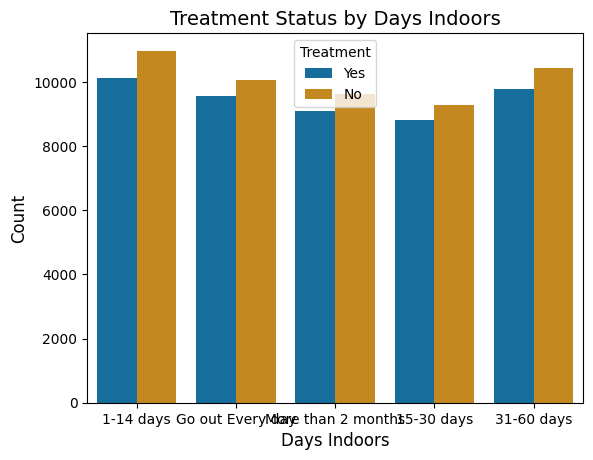

In [85]:
sns.countplot(data=df1, x='days_indoors', hue='treatment', palette='colorblind')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days Indoors', fontsize=12)
plt.title('Treatment Status by Days Indoors', fontsize=14)
plt.legend(title='Treatment')
plt.show()

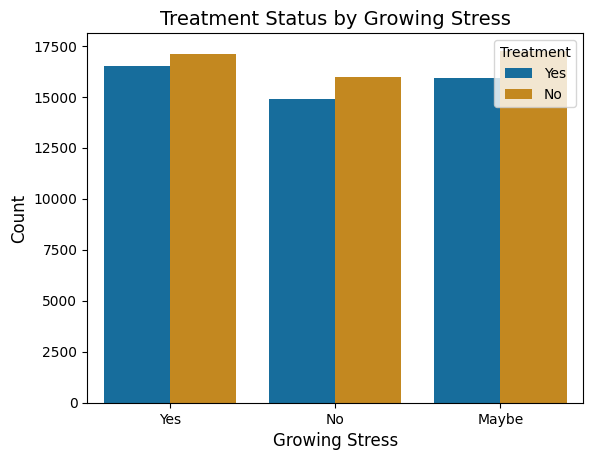

In [86]:
sns.countplot(data=df1, x='growing_stress', hue='treatment', palette='colorblind')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Growing Stress', fontsize=12)
plt.title('Treatment Status by Growing Stress', fontsize=14)
plt.legend(title='Treatment')
plt.show()

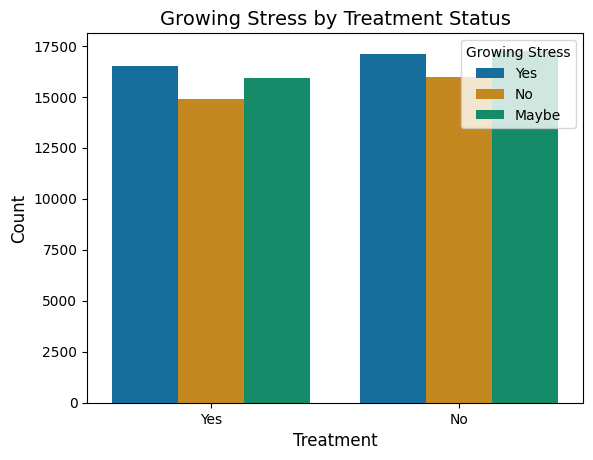

In [87]:
sns.countplot(data=df1, x='treatment', hue='growing_stress', palette='colorblind')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Treatment', fontsize=12)
plt.title('Growing Stress by Treatment Status', fontsize=14)
plt.legend(title='Growing Stress')
plt.show()

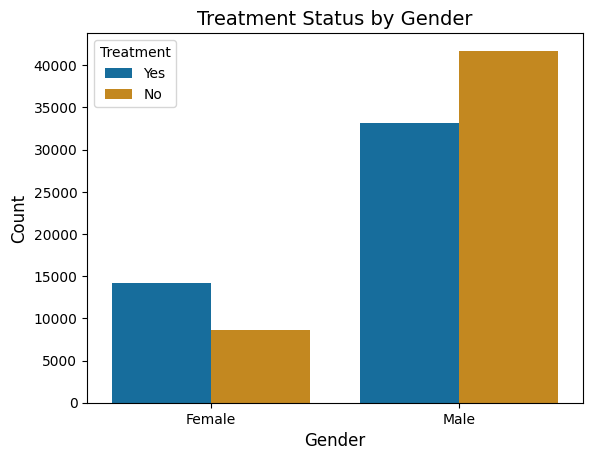

In [88]:
sns.countplot(data=df1, x='gender', hue='treatment', palette='colorblind')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.title('Treatment Status by Gender', fontsize=14)
plt.legend(title='Treatment')
plt.show()

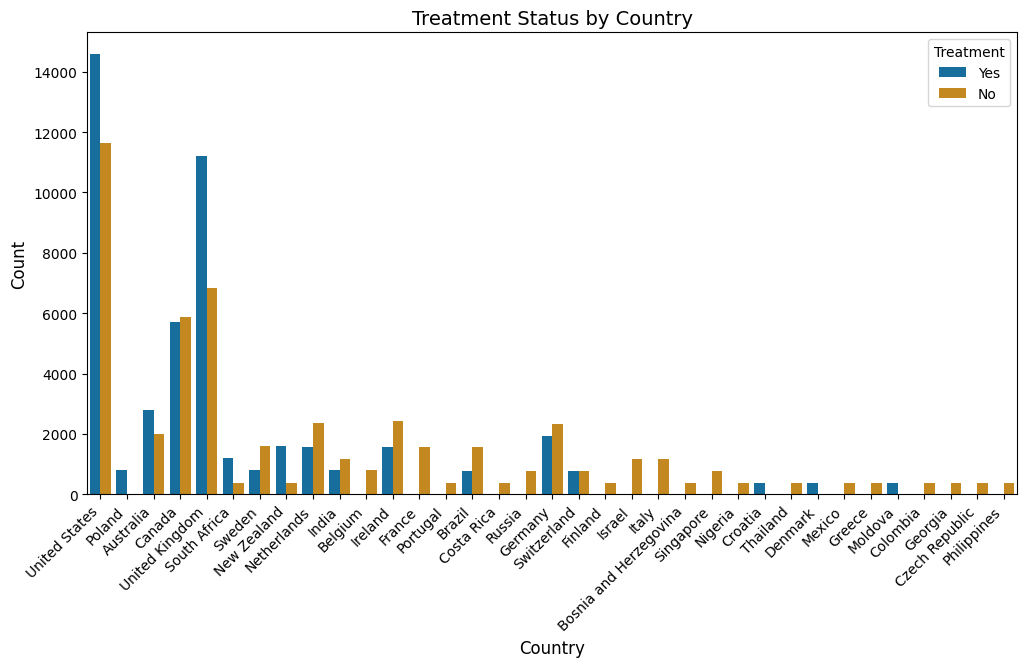

In [89]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='country', hue='treatment', palette='colorblind')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Country', fontsize=12)
xlabels = plt.xticks(rotation=45, ha='right')
plt.title('Treatment Status by Country', fontsize=14)
plt.legend(title='Treatment')
plt.show()

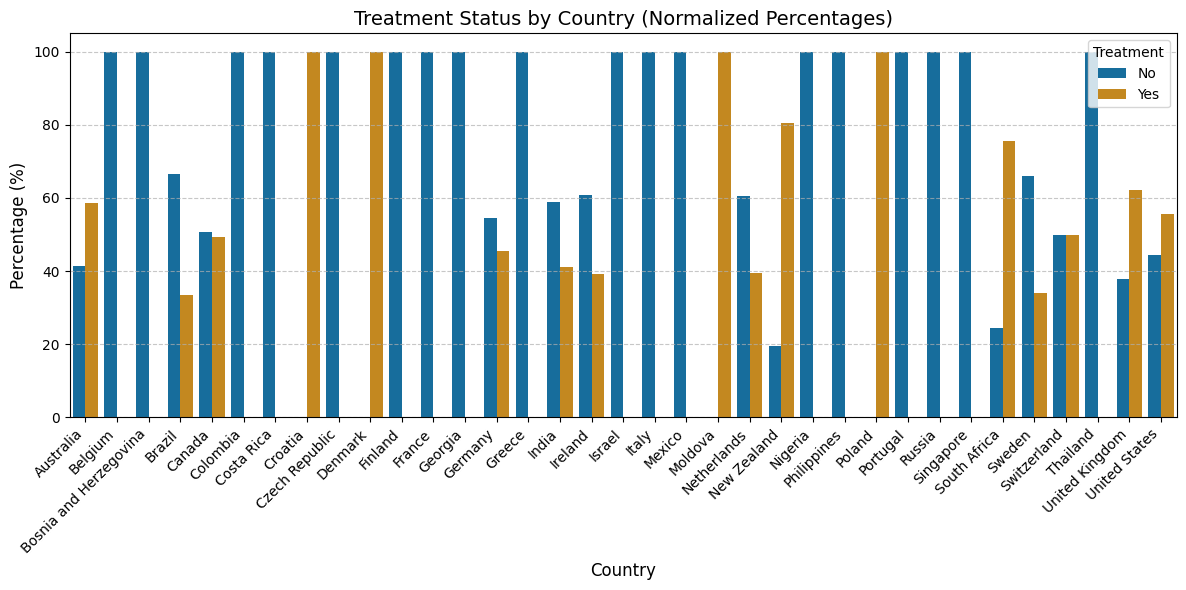

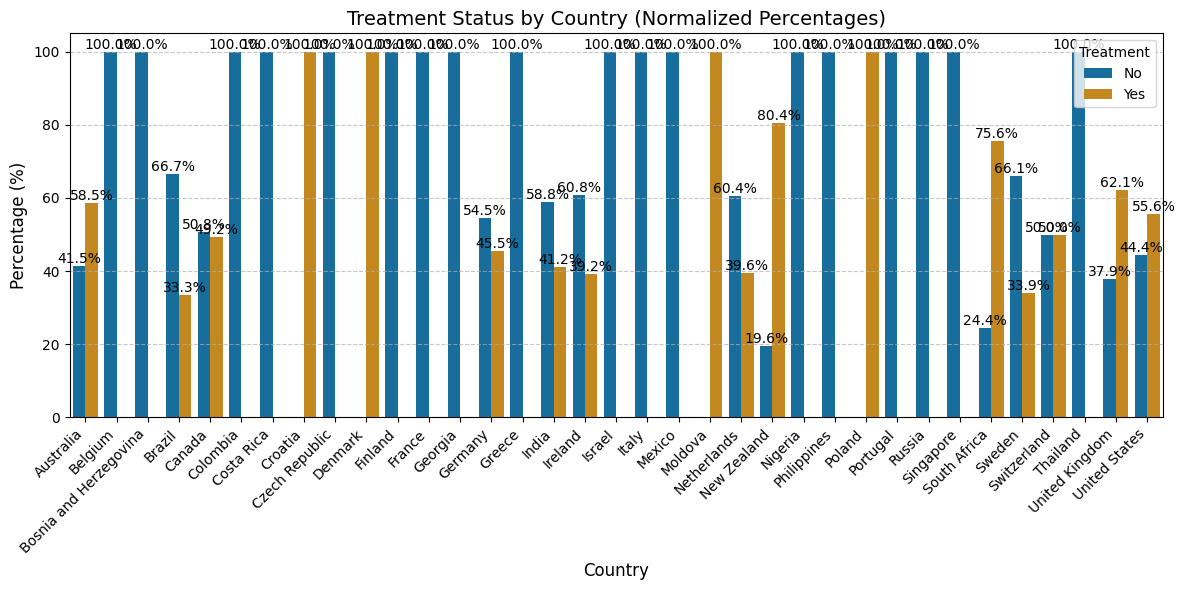

In [90]:
# 1. Calculate the counts for each country-treatment combination
counts = df1.groupby(['country', 'treatment']).size().reset_index(name='count')

# 2. Calculate the total count for each country
total_counts = df1.groupby('country').size().reset_index(name='total_country_count')

# 3. Merge the counts with the total_counts
df_normalized = pd.merge(counts, total_counts, on='country')

# 4. Calculate the percentage/proportion
df_normalized['percentage'] = (df_normalized['count'] / df_normalized['total_country_count']) * 100

# --- Plotting the Normalized Countplot ---

plt.figure(figsize=(12, 6))

# Use a barplot for normalized counts.
# 'x' will be 'country', 'y' will be 'percentage', and 'hue' will be 'treatment'.
sns.barplot(data=df_normalized, x='country', y='percentage', hue='treatment', palette='colorblind')

plt.ylabel('Percentage (%)', fontsize=12) # Change y-label to reflect percentage
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.title('Treatment Status by Country (Normalized Percentages)', fontsize=14)
plt.legend(title='Treatment')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a grid for better readability of percentages
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# If you also want to see the exact percentage values on top of the bars:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_normalized, x='country', y='percentage', hue='treatment', palette='colorblind')

plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.title('Treatment Status by Country (Normalized Percentages)', fontsize=14)
plt.legend(title='Treatment')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.tight_layout()
plt.show()

In [91]:
df.treatment.value_counts()

treatment
Yes    147606
No     144758
Name: count, dtype: int64

### Baseline and ML Modelling

In [92]:
# Import tools for ML modelling
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, precision_recall_curve, f1_score, classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
import warnings

warnings.filterwarnings("ignore")


In [93]:
# Convert 'treatment' column to categorical type
df2 = df1.copy()
df2['treatment'] = df2['treatment'].replace({'Yes': 1, 'No': 0}).astype('int')

In [94]:
# Define features and target variable
X = df2.drop(columns=['treatment'])
y = df2['treatment'] 

In [95]:
y.value_counts()

treatment
0    50350
1    47373
Name: count, dtype: int64

In [133]:
# Train-test split
stratify_by_combo = X['country'].astype(str) + '_' + X['gender'].astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=stratify_by_combo)


In [134]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((73292, 15), (24431, 15), (73292,), (24431,))

In [135]:
X_train.columns

Index(['gender', 'country', 'occupation', 'self_employed', 'family_history',
       'days_indoors', 'growing_stress', 'changes_habits',
       'mental_health_history', 'mood_swings', 'coping_struggles',
       'work_interest', 'social_weakness', 'mental_health_interview',
       'care_options'],
      dtype='object')

In [136]:
# Baseline model with two features on training data
baseline_features = ['growing_stress', 'coping_struggles']
def baseline_model(X_train):
    if X_train.growing_stress == 'Yes' or X_train.coping_struggles == 'Yes':
        return 1
    else:
        return 0

In [137]:
# Apply baseline model to each row in the DataFrame
y_pred_train_baseline = X_train.apply(baseline_model, axis=1)
print("Performance baseline model on test data:")
print("")
print(classification_report(y_train, y_pred_train_baseline))

Performance baseline model on test data:

              precision    recall  f1-score   support

           0       0.53      0.35      0.42     37797
           1       0.49      0.66      0.56     35495

    accuracy                           0.50     73292
   macro avg       0.51      0.51      0.49     73292
weighted avg       0.51      0.50      0.49     73292



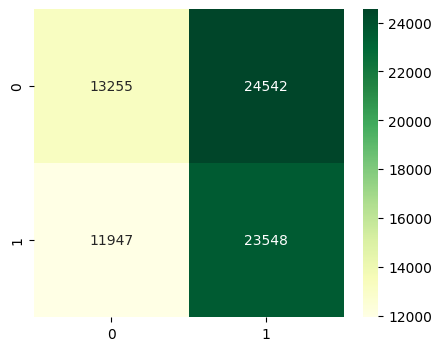

In [138]:
cm = confusion_matrix(y_train, y_pred_train_baseline)#, normalize='all')
fig, ax = plt.subplots(figsize=(5, 4))  
sns.heatmap(cm, annot=True, cmap='YlGn', ax=ax, fmt='d')
plt.show()

In [139]:
# Baseline model with two features on test data
baseline_features = ['growing_stress', 'coping_struggles']
def baseline_model(X_test):
    if X_test.growing_stress == 'Yes' or X_test.coping_struggles == 'Yes':
        return 1
    else:
        return 0

In [140]:
# Apply baseline model to each row in the DataFrame
y_pred_test_baseline = X_test.apply(baseline_model, axis=1)
print("Performance baseline model on test data:")
print("")
print(classification_report(y_test, y_pred_test_baseline))

Performance baseline model on test data:

              precision    recall  f1-score   support

           0       0.52      0.34      0.41     12553
           1       0.49      0.66      0.56     11878

    accuracy                           0.50     24431
   macro avg       0.50      0.50      0.49     24431
weighted avg       0.50      0.50      0.48     24431



### Qualitative features and complex problem
- It appears that other factors also influence the decision making whether to seek support or not, such as family history and mental health status.
- Decided to include all features for modelling

In [141]:
X_train.columns

Index(['gender', 'country', 'occupation', 'self_employed', 'family_history',
       'days_indoors', 'growing_stress', 'changes_habits',
       'mental_health_history', 'mood_swings', 'coping_struggles',
       'work_interest', 'social_weakness', 'mental_health_interview',
       'care_options'],
      dtype='object')

In [142]:
X_train.country.unique()

array(['United States', 'Philippines', 'Ireland', 'United Kingdom',
       'Poland', 'Italy', 'South Africa', 'Netherlands', 'Sweden',
       'Canada', 'Australia', 'New Zealand', 'Belgium', 'India',
       'Germany', 'Nigeria', 'Bosnia and Herzegovina', 'Israel', 'Brazil',
       'Denmark', 'Georgia', 'France', 'Portugal', 'Czech Republic',
       'Finland', 'Mexico', 'Greece', 'Singapore', 'Colombia',
       'Switzerland', 'Croatia', 'Moldova', 'Russia', 'Costa Rica',
       'Thailand'], dtype=object)

In [143]:
X.growing_stress.value_counts()

growing_stress
Yes      33639
Maybe    33194
No       30890
Name: count, dtype: int64

### Separate features based on types

- The dataset contains only categorical features hence very qualitative analysis

- Nominal Categorical Data : For e.g. "Different types of occupation/country/gender" 
This is a nominal categorical variable because there is no inherent order between different occupations (e.g., "Engineer" is not "greater than" "Doctor").

- Ordinal Categorical Data : For e.g. "Yes, Maybe, No" "Low, Medium, High"
This is a classic example of an ordinal categorical variable because there's a clear, meaningful order: "No < Maybe < Yes" or "Low < Medium < High"

In [144]:
nom_features = ['gender', 'country', 'occupation', 'self_employed', 'family_history', 'coping_struggles']
ord_features = ['mood_swings', 'growing_stress', 'work_interest', 'social_weakness', 'days_indoors']

In [145]:
X1 = df2.drop(columns=['treatment', 'country'])
nom_features1 = ['gender', 'occupation', 'self_employed', 'family_history', 'coping_struggles']

In [146]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, random_state=42, stratify=df2['gender'])

In [147]:
# Pipeline for nominal features
nom_pipeline_1hot = Pipeline([
    ('imputer_cat', SimpleImputer(strategy='constant', fill_value='missing')),
    ('1hot', OneHotEncoder(handle_unknown='ignore'))
])
# Pipeline for categorical features 
ord_pipeline = Pipeline([
    #('imputer_cat', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinal', OrdinalEncoder())
])

In [148]:
preprocessor_1hot_ord = ColumnTransformer([
    ('nom', nom_pipeline_1hot, nom_features),
    ('ord', ord_pipeline, ord_features)
])

In [149]:
preprocessor_1hot_ord1 = ColumnTransformer([
    ('nom', nom_pipeline_1hot, nom_features1),
    ('ord', ord_pipeline, ord_features)
])

In [150]:
preprocessor_1hot_ord.fit(X_train) 
X_train_1hot_ord = preprocessor_1hot_ord.transform(X_train)
X_test_1hot_ord = preprocessor_1hot_ord.transform(X_test)

In [151]:
preprocessor_1hot_ord1.fit(X1_train) 
X1_train_1hot_ord1 = preprocessor_1hot_ord1.transform(X1_train)
X1_test_1hot_ord1 = preprocessor_1hot_ord1.transform(X1_test)

### Modelling and Evaluation on Test Dataset
- Different ML models were employed: KNN, Logistic regression, Random Forest, XG Boost in combination with Grid Search and Max Voting (RF + XGB)
- For evaluation checked precision, recall, f1-score


In [152]:
# Apply logistic regression model
lr = LogisticRegression(random_state=42, max_iter=1500, class_weight="balanced")
lr.fit(X_train_1hot_ord, y_train)
y_pred_train_lr = lr.predict(X_train_1hot_ord)
y_pred_test_lr = lr.predict(X_test_1hot_ord)

In [153]:
# Evaluate the logistic regression model
print('Performance on Train Dataset')
print(classification_report(y_train, y_pred_train_lr))
print('______________________________________________')
print('Performance on Test Dataset')
print(classification_report(y_test, y_pred_test_lr))

Performance on Train Dataset
              precision    recall  f1-score   support

           0       0.71      0.67      0.69     37797
           1       0.67      0.71      0.69     35495

    accuracy                           0.69     73292
   macro avg       0.69      0.69      0.69     73292
weighted avg       0.69      0.69      0.69     73292

______________________________________________
Performance on Test Dataset
              precision    recall  f1-score   support

           0       0.71      0.68      0.69     12553
           1       0.67      0.71      0.69     11878

    accuracy                           0.69     24431
   macro avg       0.69      0.69      0.69     24431
weighted avg       0.69      0.69      0.69     24431



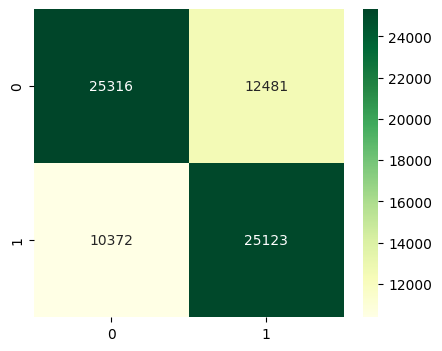

In [154]:
cm = confusion_matrix(y_train, y_pred_train_lr)#, normalize='all')
fig, ax = plt.subplots(figsize=(5, 4))  
sns.heatmap(cm, annot=True, cmap='YlGn', ax=ax, fmt='d')
plt.show()

In [155]:
lr_params = lr.get_params()
lr_params

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1500,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [156]:
lrg = LogisticRegression(random_state=42, max_iter=1500, penalty='l2', fit_intercept= True, warm_start = False, class_weight="balanced")
param_logreg = {'C': [0.2, 0.5, 1.0,],
                'solver': ['liblinear', 'lbfgs', 'sag'],
                'intercept_scaling': [1.0, 2.0]
               }

grid_logreg = GridSearchCV(lr, param_grid=param_logreg, cv=5, scoring='roc_auc', 
                           verbose=5, n_jobs=-1)
grid_logreg.fit(X_train_1hot_ord, y_train)


print("Best parameters for Logistic Regression:", grid_logreg.best_params_)
print('Best score:\n{:.2f}'.format(grid_logreg.best_score_))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for Logistic Regression: {'C': 0.5, 'intercept_scaling': 1.0, 'solver': 'lbfgs'}
Best score:
0.76


In [157]:
# Save best model (including fitted preprocessing steps) as best_model 
best_model_logreg = grid_logreg.best_estimator_
best_model_logreg
# Apply the best model to the training and test data
y_pred_train_logreg = best_model_logreg.predict(X_train_1hot_ord)
y_pred_test_logreg = best_model_logreg.predict(X_test_1hot_ord)
# Evaluate the best logistic regression model
print('Performance on Train Dataset')
print(classification_report(y_train, y_pred_train_logreg))
print('______________________________________________')
print('Performance on Test Dataset')
print(classification_report(y_test, y_pred_test_logreg))

Performance on Train Dataset
              precision    recall  f1-score   support

           0       0.71      0.67      0.69     37797
           1       0.67      0.70      0.69     35495

    accuracy                           0.69     73292
   macro avg       0.69      0.69      0.69     73292
weighted avg       0.69      0.69      0.69     73292

______________________________________________
Performance on Test Dataset
              precision    recall  f1-score   support

           0       0.71      0.68      0.69     12553
           1       0.68      0.71      0.69     11878

    accuracy                           0.69     24431
   macro avg       0.69      0.69      0.69     24431
weighted avg       0.69      0.69      0.69     24431



In [80]:
# Apply Random Forest model
rf = RandomForestClassifier(random_state=42, min_samples_leaf=25, class_weight="balanced")
rf.fit(X_train_1hot_ord, y_train)
y_pred_train_rf = rf.predict(X_train_1hot_ord)
y_pred_test_rf = rf.predict(X_test_1hot_ord)

In [81]:
# Evaluate the Random Forest model
print('Performance on Train Dataset')
print(classification_report(y_train, y_pred_train_rf))
print('______________________________________________')
print('Performance on Test Dataset')
print(classification_report(y_test, y_pred_test_rf))

Performance on Train Dataset
              precision    recall  f1-score   support

           0       0.79      0.64      0.71     37797
           1       0.68      0.81      0.74     35495

    accuracy                           0.73     73292
   macro avg       0.73      0.73      0.72     73292
weighted avg       0.74      0.73      0.72     73292

______________________________________________
Performance on Test Dataset
              precision    recall  f1-score   support

           0       0.76      0.63      0.69     12553
           1       0.67      0.79      0.72     11878

    accuracy                           0.71     24431
   macro avg       0.71      0.71      0.71     24431
weighted avg       0.72      0.71      0.71     24431



In [92]:
print("Parameters for Random Forest:", rf.get_params())

Parameters for Random Forest: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 25, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [97]:
rf = RandomForestClassifier(random_state=42, n_estimators=100, min_samples_split= 2, bootstrap=True, class_weight="balanced")
param_rf = {'min_samples_leaf': [25, 30, 35],
            'min_impurity_decrease': [0.0, 0.002],
            'criterion': ['gini', 'entropy'],
            'warm_start': [True, False]
            }

grid_rfg = GridSearchCV(rf, param_grid=param_rf, cv=5, scoring='roc_auc', verbose=5, n_jobs=-1)
grid_rfg.fit(X_train_1hot_ord, y_train)


print("Best parameters for Random Forest:", grid_rfg.best_params_)
print('Best score:\n{:.2f}'.format(grid_rfg.best_score_))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for Random Forest: {'criterion': 'entropy', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 35, 'warm_start': True}
Best score:
0.82


In [98]:
# Save best model (including fitted preprocessing steps) as best_model 
best_model_rfg = grid_rfg.best_estimator_
best_model_rfg
# Apply the best model to the training and test data
y_pred_train_rfg = best_model_rfg.predict(X_train_1hot_ord)
y_pred_test_rfg = best_model_rfg.predict(X_test_1hot_ord)
# Evaluate the best random forest model
print('Performance on Train Dataset')
print(classification_report(y_train, y_pred_train_rfg))
print('______________________________________________')
print('Performance on Test Dataset')
print(classification_report(y_test, y_pred_test_rfg))

Performance on Train Dataset
              precision    recall  f1-score   support

           0       0.78      0.65      0.71     37797
           1       0.68      0.80      0.74     35495

    accuracy                           0.72     73292
   macro avg       0.73      0.73      0.72     73292
weighted avg       0.73      0.72      0.72     73292

______________________________________________
Performance on Test Dataset
              precision    recall  f1-score   support

           0       0.76      0.64      0.70     12553
           1       0.67      0.79      0.73     11878

    accuracy                           0.71     24431
   macro avg       0.72      0.71      0.71     24431
weighted avg       0.72      0.71      0.71     24431



In [99]:
# Apply Xg Boost model
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_1hot_ord, y_train)
y_pred_train_xgb = xgb.predict(X_train_1hot_ord)
y_pred_test_xgb = xgb.predict(X_test_1hot_ord)

In [101]:
# Evaluate the XG Boost model
print('Performance on Train Dataset')
print(classification_report(y_train, y_pred_train_xgb))
print('______________________________________________')
print('Performance on Test Dataset')
print(classification_report(y_test, y_pred_test_xgb))

Performance on Train Dataset
              precision    recall  f1-score   support

           0       0.76      0.68      0.72     37797
           1       0.69      0.77      0.73     35495

    accuracy                           0.72     73292
   macro avg       0.73      0.73      0.72     73292
weighted avg       0.73      0.72      0.72     73292

______________________________________________
Performance on Test Dataset
              precision    recall  f1-score   support

           0       0.75      0.68      0.71     12553
           1       0.69      0.76      0.72     11878

    accuracy                           0.72     24431
   macro avg       0.72      0.72      0.72     24431
weighted avg       0.72      0.72      0.72     24431



In [102]:
print("Parameters for Random Forest:", xgb.get_params())

Parameters for Random Forest: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [103]:
xgb = XGBClassifier(random_state=42)
param_grid_xgb = {
    'learning_rate': [0.05, 0.1, 1.0, 5.0, None],
    'eval_metric': ['logloss', 'auc'],
    }
grid_xgb = GridSearchCV(xgb, param_grid=param_grid_xgb, cv=5, scoring='roc_auc', 
                           verbose=5, n_jobs=-1)
grid_xgb.fit(X_train_1hot_ord, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'eval_metric': ['logloss', 'auc'], 'learning_rate': [0.05, 0.1, ...]}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,5
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [104]:
# Save best model (including fitted preprocessing steps) as best_model 
best_model_xgbg = grid_xgb.best_estimator_
best_model_xgbg
# Apply the best model to the training and test data
y_pred_train_xgbg = best_model_xgbg.predict(X_train_1hot_ord)
y_pred_test_xgbg = best_model_xgbg.predict(X_test_1hot_ord)
# Evaluate the best random forest model
print('Performance on Train Dataset')
print(classification_report(y_train, y_pred_train_xgbg))
print('______________________________________________')
print('Performance on Test Dataset')
print(classification_report(y_test, y_pred_test_xgbg))

Performance on Train Dataset
              precision    recall  f1-score   support

           0       0.76      0.68      0.72     37797
           1       0.69      0.77      0.73     35495

    accuracy                           0.72     73292
   macro avg       0.73      0.73      0.72     73292
weighted avg       0.73      0.72      0.72     73292

______________________________________________
Performance on Test Dataset
              precision    recall  f1-score   support

           0       0.75      0.68      0.71     12553
           1       0.69      0.76      0.72     11878

    accuracy                           0.72     24431
   macro avg       0.72      0.72      0.72     24431
weighted avg       0.72      0.72      0.72     24431



In [ ]:
model = VotingClassifier(estimators = [('lr', lr), ('xgb', xgb), ('rf', rf)], voting = 'soft') 
model.fit(X_train_1hot_ord, y_train)

,estimators,"[('lr', ...), ('xgb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1


In [129]:
vc_train_pred = model.predict(X_train_1hot_ord)
vc_test_pred = model.predict(X_test_1hot_ord)

In [130]:
print('Performance on Train Dataset')
print(classification_report(y_train, vc_train_pred))
print('______________________________________________')
print('Performance on Test Dataset')
print(classification_report(y_test, vc_test_pred))

Performance on Train Dataset
              precision    recall  f1-score   support

           0       0.79      0.68      0.73     37741
           1       0.71      0.80      0.75     35551

    accuracy                           0.74     73292
   macro avg       0.75      0.74      0.74     73292
weighted avg       0.75      0.74      0.74     73292

______________________________________________
Performance on Test Dataset
              precision    recall  f1-score   support

           0       0.68      0.60      0.64     12609
           1       0.62      0.70      0.66     11822

    accuracy                           0.65     24431
   macro avg       0.65      0.65      0.65     24431
weighted avg       0.65      0.65      0.65     24431



In [131]:
model1 = VotingClassifier(estimators = [('xgb', xgb), ('rf', rf)], voting = 'soft') 
model1.fit(X_train_1hot_ord, y_train)

,estimators,"[('xgb', ...), ('rf', ...)]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None


In [132]:
vc_train_pred_xgb_rf = model1.predict(X_train_1hot_ord)
vc_test_pred_xgb_rf = model1.predict(X_test_1hot_ord)

In [133]:
print('Performance on Train Dataset')
print(classification_report(y_train, vc_train_pred_xgb_rf))
print('______________________________________________')
print('Performance on Test Dataset')
print(classification_report(y_test, vc_test_pred_xgb_rf))

Performance on Train Dataset
              precision    recall  f1-score   support

           0       0.78      0.66      0.71     37741
           1       0.69      0.80      0.74     35551

    accuracy                           0.73     73292
   macro avg       0.73      0.73      0.73     73292
weighted avg       0.73      0.73      0.72     73292

______________________________________________
Performance on Test Dataset
              precision    recall  f1-score   support

           0       0.76      0.64      0.70     12609
           1       0.67      0.79      0.73     11822

    accuracy                           0.71     24431
   macro avg       0.72      0.71      0.71     24431
weighted avg       0.72      0.71      0.71     24431



In [105]:
model2 = VotingClassifier(estimators = [('xgb', best_model_xgbg), ('rf', best_model_rfg)], voting = 'soft') 
model2.fit(X_train_1hot_ord, y_train)

,estimators,"[('xgb', ...), ('rf', ...)]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None


In [106]:
vc_train_pred_xgbg_rfg = model2.predict(X_train_1hot_ord)
vc_test_pred_xgbg_rfg = model2.predict(X_test_1hot_ord)

In [107]:
print('Performance on Train Dataset')
print(classification_report(y_train, vc_train_pred_xgbg_rfg))
print('______________________________________________')
print('Performance on Test Dataset')
print(classification_report(y_test, vc_test_pred_xgbg_rfg))

Performance on Train Dataset
              precision    recall  f1-score   support

           0       0.77      0.66      0.71     37797
           1       0.69      0.80      0.74     35495

    accuracy                           0.72     73292
   macro avg       0.73      0.73      0.72     73292
weighted avg       0.73      0.72      0.72     73292

______________________________________________
Performance on Test Dataset
              precision    recall  f1-score   support

           0       0.76      0.65      0.70     12553
           1       0.68      0.78      0.73     11878

    accuracy                           0.72     24431
   macro avg       0.72      0.72      0.72     24431
weighted avg       0.72      0.72      0.71     24431



In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [140]:
# Apply KNN model
knn = KNeighborsClassifier()
# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_knn = GridSearchCV(knn, param_grid=param_grid_knn, cv=5, scoring='roc_auc', 
                           verbose=5, n_jobs=-1)
grid_knn.fit(X_train_1hot_ord, y_train)
print("Best parameters for KNN:", grid_knn.best_params_)
print('Best score:\n{:.2f}'.format(grid_knn.best_score_))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}
Best score:
0.65


In [142]:
# Save best model (including fitted preprocessing steps) as best_model 
best_model_knng = grid_knn.best_estimator_
best_model_knng
# Apply the best model to the training and test data
y_pred_train_knng = best_model_knng.predict(X_train_1hot_ord)
y_pred_test_knng = best_model_knng.predict(X_test_1hot_ord)
# Evaluate the best random forest model
print('Performance on Train Dataset')
print(classification_report(y_train, y_pred_train_knng))
print('______________________________________________')
print('Performance on Test Dataset')
print(classification_report(y_test, y_pred_test_knng))

Performance on Train Dataset
              precision    recall  f1-score   support

           0       0.67      0.79      0.72     37741
           1       0.72      0.58      0.64     35551

    accuracy                           0.69     73292
   macro avg       0.69      0.68      0.68     73292
weighted avg       0.69      0.69      0.68     73292

______________________________________________
Performance on Test Dataset
              precision    recall  f1-score   support

           0       0.59      0.70      0.64     12609
           1       0.59      0.47      0.53     11822

    accuracy                           0.59     24431
   macro avg       0.59      0.58      0.58     24431
weighted avg       0.59      0.59      0.58     24431



In [115]:
best_model_logreg.fit(X1_train_1hot_ord1, y1_train)
y1_pred_train_lr = best_model_logreg.predict(X1_train_1hot_ord1)
y1_pred_test_lr = best_model_logreg.predict(X1_test_1hot_ord1)

In [116]:
# Evaluate the logistic regression model
print('Performance on Train Dataset')
print(classification_report(y1_train, y1_pred_train_lr))
print('______________________________________________')
print('Performance on Test Dataset')
print(classification_report(y1_test, y1_pred_test_lr))

Performance on Train Dataset
              precision    recall  f1-score   support

           0       0.64      0.72      0.68     37737
           1       0.66      0.56      0.61     35555

    accuracy                           0.65     73292
   macro avg       0.65      0.64      0.64     73292
weighted avg       0.65      0.65      0.64     73292

______________________________________________
Performance on Test Dataset
              precision    recall  f1-score   support

           0       0.64      0.72      0.68     12613
           1       0.65      0.57      0.61     11818

    accuracy                           0.64     24431
   macro avg       0.65      0.64      0.64     24431
weighted avg       0.65      0.64      0.64     24431

